In [ ]:
%matplotlib inline


Constraint optimization: visualizing the geometry
==================================================

A small figure explaining optimization with constraints



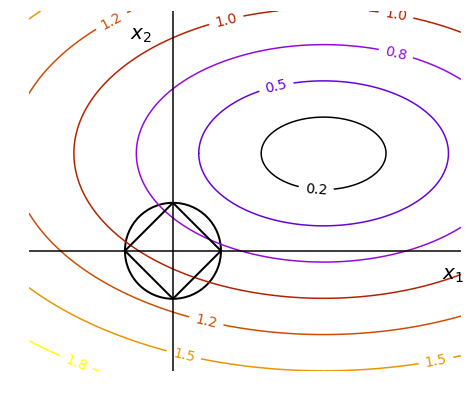

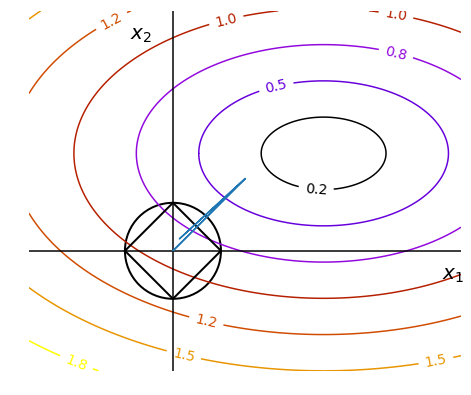

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x, y = np.mgrid[-2.9:5.8:.05, -2.5:5:.05]
x = x.T
y = y.T

def get_f(x):
    return np.sqrt(((x[0] - 3)/5)**2 + ((x[1] - 2)/3)**2)

for i in (1, 2):
    # Create 2 figure: only the second one will have the optimization
    # path
    plt.figure(i, figsize=(6, 5))
    plt.clf()
    plt.axes([0, 0, 1, 1])

    contours = plt.contour(get_f([x,y]),
                        extent=[-3, 6, -2.5, 5],
                        cmap=plt.cm.gnuplot)
    plt.clabel(contours,
            inline=1,
            fmt='%1.1f',
            fontsize=14)
    plt.plot([-1, 0,  1,  0, -1],
            [0,  1,  0, -1, 0], 'k', linewidth=2)
#     plt.fill_between([ -1.5,  1.5],
#                     [ -1.5, -1.5],
#                     [  1.5,  1.5],
#                     color='.8')
    c = plt.Circle((0, 0), 1, color='k', fill=False, linewidth=2)
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')

    plt.text(-.9, 4.4, '$x_2$', size=20)
    plt.text(5.6, -.6, '$x_1$', size=20)
    plt.axis('equal')
    plt.axis('off')
    plt.gcf().gca().add_artist(c)


# And now plot the optimization path
accumulator = list()

def f(x):
    # Store the list of function calls
    accumulator.append(x)
    return get_f(x)


# We don't use the gradient, as with the gradient, L-BFGS is too fast,
# and finds the optimum without showing us a pretty path
# def f_prime(x):
#     r = np.sqrt((x[0] - 3)**2 + (x[0] - 2)**2)
#     return np.array(((x[0] - 3)/r, (x[0] - 2)/r))

optimize.minimize(f, np.array([0, 0]), method="L-BFGS-B",
                     bounds=((-1.5, 1.5), (-1.5, 1.5)))

accumulated = np.array(accumulator)
plt.plot(accumulated[:, 0], accumulated[:, 1])

plt.show()

In [8]:
accumulated

array([[1.50000000e+00, 1.50000000e+00],
       [1.00000000e-08, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e-08],
       [1.50000000e+00, 1.50000000e+00],
       [8.30454916e-02, 2.76818268e-01],
       [8.30454816e-02, 2.76818278e-01],
       [1.50000000e+00, 1.50000000e+00],
       [1.50000001e+00, 1.50000000e+00],
       [1.50000000e+00, 1.50000001e+00]])